In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
df = pd.read_csv('u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
df.to_csv('ratings.csv', index=False)
ratings_data=pd.read_csv('ratings.csv')

In [3]:
ratings_data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
item_data_path = 'u.item'
column_names = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL',
                'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
                'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df = pd.read_csv(item_data_path, sep='|', names=column_names, encoding='latin-1')
df.to_csv('movies.csv', index=False)
movie_data=pd.read_csv('movies.csv')

In [5]:
user_data_path = 'u.user'
column_names = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
df = pd.read_csv(user_data_path, sep='|', names=column_names)
df.to_csv('users.csv', index=False)
user_data=pd.read_csv('users.csv')

In [6]:
movie_data.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
def clean_movie_title(title):
    # Use a regex pattern to find and remove parentheses and their contents
    title = re.sub(r'\([^)]*\)', '', title)
    # Strip any leading or trailing whitespace
    title = title.strip()
    return title
movie_data['movie_title'] = movie_data['movie_title'].apply(clean_movie_title)

In [8]:
movie_data.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children            1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [10]:
user_data.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [11]:
ratings_data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [13]:
ratings_data.drop( "timestamp", inplace = True, axis = 1 )
ratings_data.head(2)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3


In [14]:
ratings_data = ratings_data.merge(movie_data[['movie_id', 'movie_title']], on='movie_id')
ratings_data.head(2)

,user_id,movie_id,rating,movie_title
0,196,242,3,Kolya
1,63,242,3,Kolya


In [15]:
print("Summary Statistics for Ratings:")
print(ratings_data['rating'].describe())

Summary Statistics for Ratings:
count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [16]:
ratings_data['rating'] = ratings_data['rating'].astype(float)
print("Data Types after Conversion:")
print(ratings_data.dtypes)

Data Types after Conversion:
user_id          int64
movie_id         int64
rating         float64
movie_title     object
dtype: object


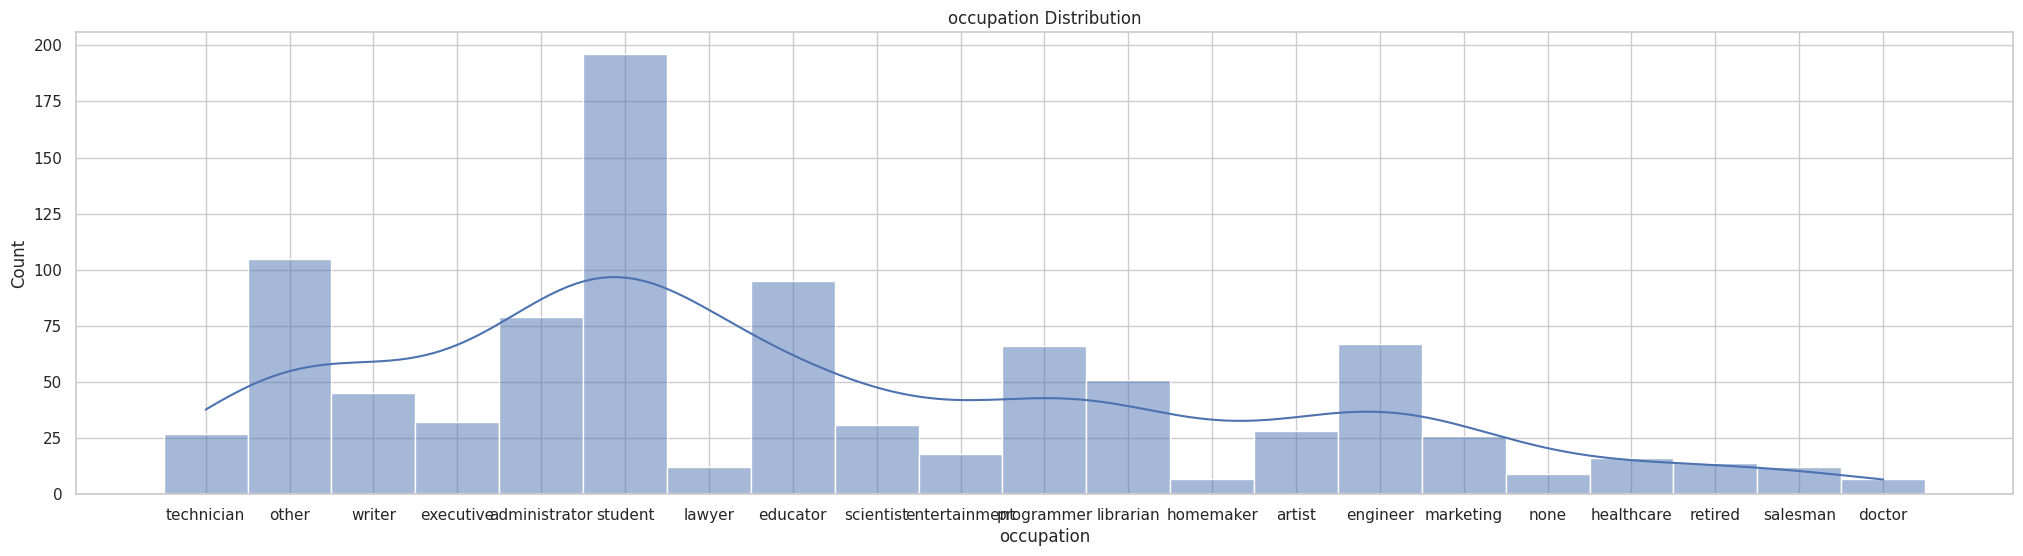

In [17]:
sns.set(style="whitegrid")
column_name = "occupation"
plt.figure(figsize=(25, 6))
sns.histplot(data=user_data, x=column_name, kde=True, stat="count", common_norm=False)
plt.title(f"{column_name} Distribution")
plt.show()

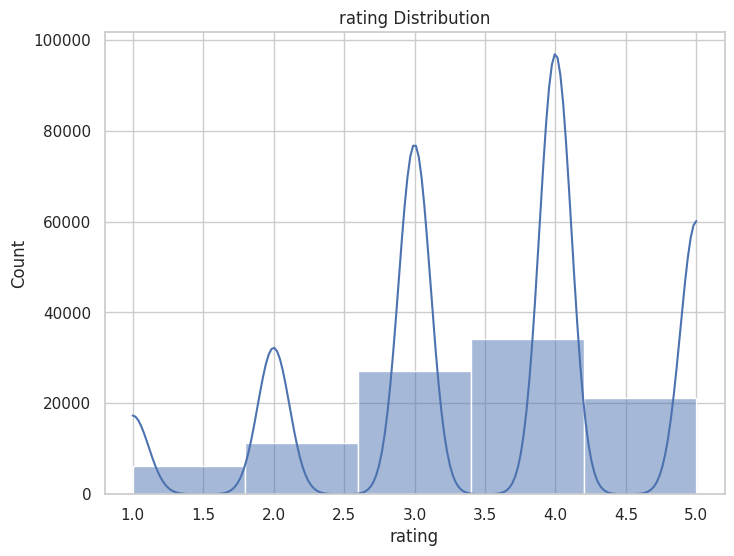

In [18]:
sns.set(style="whitegrid")
column_name = "rating"
plt.figure(figsize=(8, 6))
sns.histplot(data=ratings_data, x=column_name, kde=True, stat="count", common_norm=False, bins=5)
plt.title(f"{column_name} Distribution")
plt.show()

In [19]:
# Check for missing values in ratings
missing_values = ratings_data.isnull().sum()
print("Missing Values in Ratings Data:")
print(missing_values)

# Remove duplicates, if any
ratings_data = ratings_data.drop_duplicates()


Missing Values in Ratings Data:
user_id        0
movie_id       0
rating         0
movie_title    0
dtype: int64


In [20]:
# Count the number of movies in each genre
genre_counts = movie_data.loc[:, "Action":"Western"].sum()
print("Movie Genre Counts:")
print(genre_counts)

Movie Genre Counts:
Action         251
Adventure      135
Animation       42
Children       122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


In [21]:
# Number of ratings per user
user_ratings_count = ratings_data['user_id'].value_counts()
print("UserID  NoOfRatings")
print(user_ratings_count)
# Number of ratings per movie
movie_ratings_count = ratings_data['movie_id'].value_counts()
print("MovieID NoOf Ratings")
print(movie_ratings_count)

UserID  NoOfRatings
405    737
655    685
13     636
450    540
276    518
      ... 
888     20
34      20
19      20
809     20
873     20
Name: user_id, Length: 943, dtype: int64
MovieID NoOf Ratings
50      583
258     509
100     508
181     507
294     485
       ... 
852       1
1505      1
1653      1
1452      1
1641      1
Name: movie_id, Length: 1682, dtype: int64
